# Competition (3) - Blood Disease Classification

***

**Team members :**

1- Anas Ali

2- Abdullah

3- Moyead

***
# 1- Get the Data
***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.svm import SVC
from pathlib import Path
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import random
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay ,classification_report
from sklearn.model_selection import learning_curve 
from sklearn.metrics import classification_report
import imgaug.augmenters as iaa
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [2]:

image_names = os.listdir("/kaggle/input/bdcbtae/bdcbtae/Images")

In [3]:
test= pd.read_csv("/kaggle/input/bdcbtae/bdcbtae/test.csv")
test.shape

(56, 1)

In [4]:
data= pd.read_csv("/kaggle/input/bdcbtae/bdcbtae/train.csv")
data.shape 

(223, 2)

#### Dispaly code . 

In [5]:
pd.set_option('display.max_columns', None)
data.describe()

,Image
count,223.000000
mean,212.986547
std,116.855092
min,0.000000
25%,114.500000
50%,218.000000
75%,307.500000
max,409.000000


In [6]:
"""
imgs = [img.name for img in Path("/content/drive/MyDrive/Images").iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get("/content/drive/MyDrive/Images/"+f)

img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)
img_meta_df["number"]=img_meta_df["FileName"].map(lambda x: int(x[-7:-4]))
img_meta_df.set_index("number",inplace=True)

data.set_index("Image",inplace=True)
ttrain=img_meta_df.join(data,how='right')
ttrain.head()

test.set_index("Image",inplace=True)
ttest=img_meta_df.join(test,how='right')
ttest.head()
"""

'\nimgs = [img.name for img in Path("/content/drive/MyDrive/Images").iterdir() if img.suffix == ".jpg"]\nimg_meta = {}\nfor f in imgs: img_meta[str(f)] = imagesize.get("/content/drive/MyDrive/Images/"+f)\n\nimg_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis([\'FileName\', \'Size\'], axis=\'columns\', inplace=False)\nimg_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)\nimg_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)\nimg_meta_df["number"]=img_meta_df["FileName"].map(lambda x: int(x[-7:-4]))\nimg_meta_df.set_index("number",inplace=True)\n\ndata.set_index("Image",inplace=True)\nttrain=img_meta_df.join(data,how=\'right\')\nttrain.head()\n\ntest.set_index("Image",inplace=True)\nttest=img_meta_df.join(test,how=\'right\')\nttest.head()\n'

***
# 2- Feature Extraction
***

In [7]:
NEUTROPHIL_ind = []
EOSINOPHIL_ind = []
LYMPHOCYTE_ind = []
MONOCYTE_ind = []
for i in range(223):
  if data.Category.loc[i] == "NEUTROPHIL":
    NEUTROPHIL_ind.append(data.Image.loc[i])
  elif data.Category.loc[i] == "EOSINOPHIL":
    EOSINOPHIL_ind.append(data.Image.loc[i])
  elif data.Category.loc[i] == "LYMPHOCYTE":
    LYMPHOCYTE_ind.append(data.Image.loc[i])
  elif data.Category.loc[i] == "MONOCYTE":
    MONOCYTE_ind.append(data.Image.loc[i])


In [8]:
ind = list(data.Image)
train_name = []
for x in image_names:
  if int(x[-7:-4]) in ind :
    train_name.append(x)
ind = list(test.Image)
test_name = []
for x in image_names:
  if int(x[-7:-4]) in ind :
    test_name.append(x)

In [9]:
NEUTROPHIL_images = []
EOSINOPHIL_images = []
LYMPHOCYTE_images = []
MONOCYTE_images = []
for name in train_name:  
    if int(name[-7:-4]) in NEUTROPHIL_ind:
        img_path = f"/kaggle/input/bdcbtae/bdcbtae/Images/{name}"
        name = cv2.imread(img_path)
        NEUTROPHIL_images.append(name)
    elif int(name[-7:-4]) in EOSINOPHIL_ind:
        img_path = f"/kaggle/input/bdcbtae/bdcbtae/Images/{name}"
        name = cv2.imread(img_path)
        EOSINOPHIL_images.append(name)
    elif int(name[-7:-4]) in LYMPHOCYTE_ind:
        img_path = f"/kaggle/input/bdcbtae/bdcbtae/Images/{name}"
        name = cv2.imread(img_path)
        LYMPHOCYTE_images.append(name)
    elif int(name[-7:-4]) in MONOCYTE_ind:
        img_path = f"/kaggle/input/bdcbtae/bdcbtae/Images/{name}"
        name = cv2.imread(img_path)
        MONOCYTE_images.append(name)


In [12]:
sigma=3
theta=1*np.pi/4
lamda=1*np.pi/4
gamma=0.4
phi=0

In [13]:
df=pd.DataFrame()

for name in train_name :
    img_path = f"/kaggle/input/bdcbtae/bdcbtae/Images/{name}"
    img = cv2.imread(img_path)
    img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
    #fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
    resized = cv2.resize(img1, (128,128))
    refigm=resized.reshape(-1)
    df[int(name[-7:-4])]=refigm
#df=df.transpose()
#len(df)

In [14]:
testf=pd.DataFrame()

for name in test_name :
    img_path = f"/kaggle/input/bdcbtae/bdcbtae/Images/{name}"
    img = cv2.imread(img_path)
    img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
    #fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
    resized = cv2.resize(img1, (128,128))
    refigm=resized.reshape(-1)
    testf[int(name[-7:-4])]=refigm
#testf=testf.transpose()
#len(testf)

***
# 3- Augmentation
***

In [15]:
import imgaug.augmenters as iaa

def flip(pic):
  augmentation = iaa.Sequential([iaa.Fliplr(random.random()),iaa.Flipud(random.random())])
  pic = augmentation(images=pic)
  return pic
def GaussianBlur(pic):
  augmentation = iaa.Sequential([iaa.GaussianBlur((random.uniform(1,5), random.uniform(1,5)))])
  pic = augmentation(images=pic)
  return pic
def Affine(pic):
  augmentation = iaa.Sequential([iaa.Affine(translate_percent={"x": (-1*random.random(), random.random()), "y": ((-1*random.random(), random.random()))},rotate=(-1*random.randint(30,90), random.randint(30,90)),scale=(0.001+random.random(), 0.001+2*random.random()))])
  pic = augmentation(images=pic)
  return pic
def HistogramEqualization(pic):
  augmentation=iaa.Sequential(iaa.Alpha((random.random(), random.random()), iaa.AllChannelsHistogramEqualization()))
  pic = augmentation(images=pic)
  return pic
def Autocontrast(pic):
  aug = iaa.pillike.Autocontrast()
  augmentation=iaa.pillike.Autocontrast((10, 20), per_channel=True)
  pic=augmentation(images=pic)
  return pic
def rotation(pic):
  augmentation = iaa.Sequential([iaa.Affine(rotate=(-1*random.randint(30,90), random.randint(30,90)))])
  pic = augmentation(images=pic)
  return pic
def scaling(pic):
  augmentation = iaa.Sequential([iaa.Affine(scale=(0.001+random.uniform(0,20), 0.001+2*random.uniform(0,19)))])
  pic = augmentation(images=pic)
  return pic
def translate(pic):
  augmentation = iaa.Sequential([iaa.Affine(translate_percent={"x": (-1*random.uniform(0,10), random.uniform(0,10)), "y": ((-1*random.uniform(0,15), random.uniform(0,15)))})])
  pic = augmentation(images=pic)
  return pic
def  FilterEdgeEnhanceMore(pic):
  augmentation=iaa.Sequential(iaa.pillike.FilterEdgeEnhanceMore())
  pic = augmentation(images=pic)
  return pic 
def  ChannelShuffle(pic):
  augmentation=iaa.Sequential(iaa.ChannelShuffle(random.random()))
  pic = augmentation(images=pic)
  return pic 
def  MotionBlur(pic):
  augmentation=iaa.Sequential(iaa.MotionBlur(k=random.randint(3,15)))
  pic = augmentation(images=pic)
  return pic 
def  DirectedEdgeDetect(pic):
  augmentation=iaa.Sequential(iaa.DirectedEdgeDetect(alpha=(0.0, 1.0), direction=(0.0, 1.0)))
  pic = augmentation(images=pic)
  return pic 
def  Clouds(pic):
  augmentation=iaa.Sequential(iaa.Clouds())
  pic = augmentation(images=pic)
  return pic
def  Rain(pic):
  a=random.random()
  augmentation=iaa.Sequential(iaa.Rain(speed=(a, a+random.random())))
  pic = augmentation(images=pic)
  return pic 



In [16]:
NEU_name=NEUTROPHIL_images
EOS_name=EOSINOPHIL_images
LYM_name=LYMPHOCYTE_images
MON_name=MONOCYTE_images

In [17]:
NEU_num=len(NEU_name)
NEU_num

140

In [18]:

augmented_images_cat = {}
NEU_num=len(NEU_name)
EOS_num=len(EOS_name)
LYM_num=len(LYM_name)
MON_num=len(MON_name)
cat_num = {"NEUTROPHIL":NEU_num,"EOSINOPHIL":EOS_num,"LYMPHOCYTE":LYM_num,"MONOCYTE":MON_num}
def Augmentation(categories,counter1,function):
    if list(categories.keys())[0] == "all" and len(categories)==1:
        limit=list(categories.values())[0]
        NEU_num=len(NEU_name)
        EOS_num=len(EOS_name)
        LYM_num=len(LYM_name)
        MON_num=len(MON_name)
        while NEU_num  < limit:
            img=  random.choice(NEUTROPHIL_images)
            img= function(img)
            NEU_name.append(img)
            img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            #kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
            #fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
            resized = cv2.resize(img1, (128,128))
            refigm=resized.reshape(-1)
            df[counter1]=refigm
            augmented_images_cat.update({counter1:"NEUTROPHIL"})
            counter1+=1
            NEU_num+=1
        while EOS_num  < limit:
            img=  random.choice(EOSINOPHIL_images)
            img= function(img)
            EOS_name.append(img)
            img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            #kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
            #fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
            resized = cv2.resize(fimg, (128,128))
            refigm=resized.reshape(-1)
            df[counter1]=refigm
            augmented_images_cat.update({counter1:"EOSINOPHIL"})
            counter1+=1
            EOS_num+=1
        while LYM_num  < limit:
            img=  random.choice(LYMPHOCYTE_images)
            img= function(img)
            LYM_name.append(img)
            img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            #kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
            #fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
            resized = cv2.resize(img1, (128,128))
            refigm=resized.reshape(-1)
            df[counter1]=refigm
            augmented_images_cat.update({counter1:"LYMPHOCYTE"})
            counter1+=1
            LYM_num+=1
        while MON_num  < limit:
            img=  random.choice(MONOCYTE_images)
            img= function(img)
            MON_name.append(img)
            img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
           # kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
           # fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
            resized = cv2.resize(img1, (128,128))
            refigm=resized.reshape(-1)
            df[counter1]=refigm
            augmented_images_cat.update({counter1:"MONOCYTE"})
            counter1+=1
            MON_num+=1
    else:
      for cat , num in categories.items():
        limit= num
        cat_samples=cat_num[cat] 
        while cat_samples < limit:
            img=  random.choice(NEUTROPHIL_images)
            img= function(img)
            img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
           # kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
            #fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
            resized = cv2.resize(img1, (128,128))
            refigm=resized.reshape(-1)
            df[counter1]=refigm
            augmented_images_cat.update({counter1:cat})
            counter1+=1
            cat_samples+=1

In [19]:
#categories= {"NEUTROPHIL":200,"EOSINOPHIL":200,"LYMPHOCYTE":200,"MONOCYTE":200}
categories= {"all":4000}
aug_function=[flip,GaussianBlur,Affine,HistogramEqualization,Autocontrast,rotation,scaling,translate,FilterEdgeEnhanceMore,ChannelShuffle,MotionBlur,DirectedEdgeDetect,Clouds,Rain]
Augmentation(categories,1000,random.choice(aug_function))


/opt/conda/lib/python3.7/site-packages/imgaug/augmenters/base.py:38: SuspiciousMultiImageShapeWarning: You provided a numpy array of shape (480, 640, 3) as a multi-image augmentation input, which was interpreted as (N, H, W). The last dimension however has value 1 or 3, which indicates that you provided a single image with shape (H, W, C) instead. If that is the case, you should use e.g. augmenter(image=<your input>) or augment_image(<your input>) -- note the singular 'image' instead of 'imageS'. Otherwise your single input image will be interpreted as multiple images of shape (H, W) during augmentation.
  category=SuspiciousMultiImageShapeWarning)


In [20]:
df= df.transpose()
df['Category']="a"
for row in range(len(data)):
  augmented_images_cat.update({data.Image.loc[row]:data.Category.loc[row]})
for item,value in augmented_images_cat.items():
    df['Category'].loc[item] = value

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df.Category.value_counts()

NEUTROPHIL    200
EOSINOPHIL    200
MONOCYTE      200
LYMPHOCYTE    200
Name: Category, dtype: int64

In [22]:
"""
def Augmentation(path, trans, aug):
    count1 = 208
    count2 = 0
    for key, val in aug.items():
        filename = new_df[new_df['label']==str(key)]['filename'].values.tolist()
        for pic in range(int(val)):
            item = random.choice(filename)
            my_pic = im.open("Images/Images/"+str(item))
            my_pic = np.array(my_pic)
            transform = trans(image=my_pic)["image"]
            img_transform =im.fromarray(transform)
            img_transform.save(path+str(key)+"/BloodImage_00"+str(1000+count2)+".jpg")
            count1+=1
            count2+=1

"""

'\ndef Augmentation(path, trans, aug):\n    count1 = 208\n    count2 = 0\n    for key, val in aug.items():\n        filename = new_df[new_df[\'label\']==str(key)][\'filename\'].values.tolist()\n        for pic in range(int(val)):\n            item = random.choice(filename)\n            my_pic = im.open("Images/Images/"+str(item))\n            my_pic = np.array(my_pic)\n            transform = trans(image=my_pic)["image"]\n            img_transform =im.fromarray(transform)\n            img_transform.save(path+str(key)+"/BloodImage_00"+str(1000+count2)+".jpg")\n            count1+=1\n     \xa0\xa0\xa0\xa0\xa0\xa0\xa0count2+=1\n\n'

In [23]:
"""
augmented_images_EOS = []
counter1=1000
augmented_images = augmentation(images=EOSINOPHIL_images)
for img in augmented_images:
    img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
    fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
    refigm=list(fimg.reshape(-1))
    augmented_images_EOS.append(refigm)
    df[counter1]=refigm
    counter1+=1
    """

'\naugmented_images_EOS = []\ncounter1=1000\naugmented_images = augmentation(images=EOSINOPHIL_images)\nfor img in augmented_images:\n    img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)\n    kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)\n    fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)\n    refigm=list(fimg.reshape(-1))\n    augmented_images_EOS.append(refigm)\n    df[counter1]=refigm\n    counter1+=1\n    '

In [24]:

"""augmented_images_LYM = []
counter2=2000
augmented_images = augmentation(images=LYMPHOCYTE_images)
for img in augmented_images:
    img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
    fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
    refigm=list(fimg.reshape(-1))
    augmented_images_LYM.append(refigm)
    df[counter2]=refigm
    counter2+=1"""

'augmented_images_LYM = []\ncounter2=2000\naugmented_images = augmentation(images=LYMPHOCYTE_images)\nfor img in augmented_images:\n    img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)\n    kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)\n    fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)\n    refigm=list(fimg.reshape(-1))\n    augmented_images_LYM.append(refigm)\n    df[counter2]=refigm\n    counter2+=1'

In [25]:
"""augmented_images_MON = []
counter3=3000
augmented_images = augmentation(images=MONOCYTE_images)
for img in augmented_images:
    img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
    fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)
    refigm=list(fimg.reshape(-1))
    augmented_images_MON.append(refigm)
    df[counter3]=refigm
    counter3+=1"""

'augmented_images_MON = []\ncounter3=3000\naugmented_images = augmentation(images=MONOCYTE_images)\nfor img in augmented_images:\n    img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)\n    kernal=cv2.getGaborKernel((40,40),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)\n    fimg=cv2.filter2D(img1,cv2.CV_8UC3,kernal)\n    refigm=list(fimg.reshape(-1))\n    augmented_images_MON.append(refigm)\n    df[counter3]=refigm\n    counter3+=1'

In [26]:
"""categories= {}
counter1=1000
counter2=2000
counter3=3000
for row in range(len(data)):
  categories.update({data.Image.loc[row]:data.Category.loc[row]})
for x in augmented_images_EOS:
  categories.update({counter1:"EOSINOPHIL"})
  counter1+=1
for y in augmented_images_LYM:
  categories.update({counter2:"LYMPHOCYTE"})
  counter2+=1
for z in augmented_images_MON:
  categories.update({counter3:"MONOCYTE"})
  counter3+=1"""

'categories= {}\ncounter1=1000\ncounter2=2000\ncounter3=3000\nfor row in range(len(data)):\n  categories.update({data.Image.loc[row]:data.Category.loc[row]})\nfor x in augmented_images_EOS:\n  categories.update({counter1:"EOSINOPHIL"})\n  counter1+=1\nfor y in augmented_images_LYM:\n  categories.update({counter2:"LYMPHOCYTE"})\n  counter2+=1\nfor z in augmented_images_MON:\n  categories.update({counter3:"MONOCYTE"})\n  counter3+=1'

In [27]:
"""df= df.transpose()
df['Category']="a"
for item,value in categories.items():
  df['Category'].loc[item] = value"""

'df= df.transpose()\ndf[\'Category\']="a"\nfor item,value in categories.items():\n  df[\'Category\'].loc[item] = value'

***
# 4- Target Encoding
***

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category']=encoder.fit_transform(df['Category'])

***
# 5- Split & Train Model
***

In [29]:
df_target= df["Category"]
df.drop("Category",axis=1,inplace=True)
x_train,x_test,y_train, y_test = train_test_split(df.values,df_target.values, test_size=0.2)


In [30]:
from sklearn.decomposition import PCA
pca = PCA()
#
# Determine transformed features
#
X_train_prepared = pca.fit_transform(x_train)
X_val_prepared = pca.transform(x_test)

# XGB

In [31]:
xgb=XGBClassifier()
xgb.fit(X_train_prepared,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [32]:
y_pred = xgb.predict(X_val_prepared)
score = classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        46
           1       1.00      0.80      0.89        25
           2       1.00      0.88      0.93        48
           3       0.59      0.90      0.71        41

    accuracy                           0.79       160
   macro avg       0.84      0.79      0.80       160
weighted avg       0.83      0.79      0.79       160



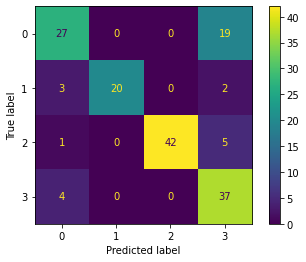

In [33]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

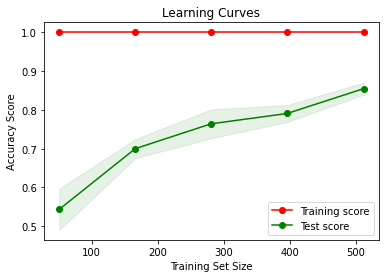

In [34]:
model =xgb

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train,scoring='accuracy')


train_mean = np.mean(train_scores, axis=1)

train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)

test_std = np.std(test_scores, axis=1)

 

# Plot the learning curve

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')

plt.plot(train_sizes, test_mean, 'o-', color='g', label='Test score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')

plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

 

plt.xlabel('Training Set Size')

plt.ylabel('Accuracy Score')

plt.legend(loc='lower right')

plt.title('Learning Curves')

 

plt.show()

# Sub

In [35]:
sample= pd.read_csv("/kaggle/input/bdcbtae/bdcbtae/sample_submission.csv")


In [36]:
test.drop([11,48],inplace=True)
test=test.set_index("Image")


In [37]:
testf= testf.transpose()

In [38]:
pca_test=pca.transform(testf)

In [39]:
predicted = xgb.predict(pca_test)
final_pred = pd.DataFrame()
final_pred["Image"] = test.index
final_pred["Category"] = predicted
final_pred["Category"]=encoder.inverse_transform(final_pred["Category"])
final_pred.to_csv("new.csv")

# Finally! 😎